**-----------------------------------------------------------------------------------------------**<br/>
         **Guias utilizados**: https://www.nltk.org/howto/sentiwordnet.html<br/>
                               http://sentistrength.wlv.ac.uk<br/>
                               https://pypi.org/project/sentistrength/<br/>
**-----------------------------------------------------------------------------------------------**

# Importes necessários

In [52]:
# !pip install googletrans==4.0.0-rc1
# !pip install sentistrength

In [15]:
import pandas as pd
# import time

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import stopwords as stw
from nltk.stem import WordNetLemmatizer

from sentistrength import PySentiStr

# from googletrans import Translator

import os.path

In [16]:
nltk.download('punkt')
nltk.download('sentiwordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\allys\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\allys\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\allys\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Lendo DataSet

In [41]:
df = pd.read_csv('dados/df.csv')
df

,Relatos,Relatos_Traduzidos
0,"Bom, o começo é sempre difícil e conturbado, p...","Well, the beginning is always difficult and tr..."
1,Nesse ano que se inicia acredito que viram mui...,This year I begun I believe they saw many chal...
2,"Como eu já disse, nunca vai ser igual o ensino...","As I have already said, it will never be equal..."
3,Minhas expectativas quanto ao ensino médio rem...,My expectations regarding remote high school:\...
4,"Devido à pandemia, a alternativa mais eficaz d...","Due to the pandemic, the most effective altern..."
...,...,...
192,Em relação ao ensino remoto eu posso dizer que...,In relation to remote education I can say that...
193,Espero que o ensino remoto seja eficiente para...,I hope that remote education is efficient for ...
194,"Bem, nos dias de hoje o ensino remoto se torno...","Well, in today's remote education has become a..."
195,Entendo que o ensino remoto é desafiador tanto...,I understand that remote teaching is challengi...


In [39]:
# del df['Relatos_Traduzidos_Lematizados']
# del df['Relatos_tokenizados']

# df.head()

In [40]:
df.to_csv('dados/df.csv', index = False)

## Traduzindo as linhas do dataset

In [18]:
def traduzir_relato(relato):
    tradutor = Translator()
    traducao = tradutor.translate(relato, src = 'pt', dest = 'en')
    time.sleep(1) # tentativa de evitar o esgotamento da cota por requição/min
    return traducao.text

In [19]:
# df['Relatos_Traduzidos'] = df['Relatos'].apply(traduzir_relato)
# df

In [20]:
# df['Relatos_Traduzidos']

# Tokenizando e removendo stopwords no dataset

In [42]:
def tokenizar_relato(relato):
    relato_tonekizado = []
    stop_words = set(stw.words('english'))
    tokenizador = word_tokenize(relato)
    
    for item in tokenizador:
        if item.isalpha():
            if not item in stop_words:
                relato_tonekizado.append(item.lower())
#         else:
#             print('caracter que nao alfabetico')
    frase = ''
    
    for palavra in relato_tonekizado:
        frase += palavra+' '
        
    return frase

In [44]:
tokenizar_relato('Hello, are you ok?')

'hello ok '

In [54]:
tokenizar_relato("Good morning, my name is Allyson. What's your name?")

'good morning name allyson what name '

In [46]:
df['Relatos_tokenizados'] = df['Relatos_Traduzidos'].apply(tokenizar_relato)
df.head()

,Relatos,Relatos_Traduzidos,Relatos_tokenizados
0,"Bom, o começo é sempre difícil e conturbado, p...","Well, the beginning is always difficult and tr...",well beginning always difficult troubled get u...
1,Nesse ano que se inicia acredito que viram mui...,This year I begun I believe they saw many chal...,this year i begun i believe saw many challenge...
2,"Como eu já disse, nunca vai ser igual o ensino...","As I have already said, it will never be equal...",as i already said never equal teaching i great...
3,Minhas expectativas quanto ao ensino médio rem...,My expectations regarding remote high school:\...,my expectations regarding remote high school m...
4,"Devido à pandemia, a alternativa mais eficaz d...","Due to the pandemic, the most effective altern...",due pandemic effective alternative study work ...


In [24]:
# del df['Relatos_Traduzidos_Lematizados']

# df.head()

# Lematizando as traduções

In [47]:
df.head()

,Relatos,Relatos_Traduzidos,Relatos_tokenizados
0,"Bom, o começo é sempre difícil e conturbado, p...","Well, the beginning is always difficult and tr...",well beginning always difficult troubled get u...
1,Nesse ano que se inicia acredito que viram mui...,This year I begun I believe they saw many chal...,this year i begun i believe saw many challenge...
2,"Como eu já disse, nunca vai ser igual o ensino...","As I have already said, it will never be equal...",as i already said never equal teaching i great...
3,Minhas expectativas quanto ao ensino médio rem...,My expectations regarding remote high school:\...,my expectations regarding remote high school m...
4,"Devido à pandemia, a alternativa mais eficaz d...","Due to the pandemic, the most effective altern...",due pandemic effective alternative study work ...


In [48]:
def lematizar_relato(relato):
    lematizador = WordNetLemmatizer()
    relato_lematizado = lematizador.lemmatize(relato)
    return relato_lematizado

In [50]:
df['Relatos_Traduzidos_Lematizados'] = df['Relatos_tokenizados'].apply(lematizar_relato)
df.head()

,Relatos,Relatos_Traduzidos,Relatos_tokenizados,Relatos_Traduzidos_Lematizados
0,"Bom, o começo é sempre difícil e conturbado, p...","Well, the beginning is always difficult and tr...",well beginning always difficult troubled get u...,well beginning always difficult troubled get u...
1,Nesse ano que se inicia acredito que viram mui...,This year I begun I believe they saw many chal...,this year i begun i believe saw many challenge...,this year i begun i believe saw many challenge...
2,"Como eu já disse, nunca vai ser igual o ensino...","As I have already said, it will never be equal...",as i already said never equal teaching i great...,as i already said never equal teaching i great...
3,Minhas expectativas quanto ao ensino médio rem...,My expectations regarding remote high school:\...,my expectations regarding remote high school m...,my expectations regarding remote high school m...
4,"Devido à pandemia, a alternativa mais eficaz d...","Due to the pandemic, the most effective altern...",due pandemic effective alternative study work ...,due pandemic effective alternative study work ...


In [28]:
# df.to_csv('dados/df.csv', index = False)

In [51]:
lematizar_relato('corpora')

'corpus'

In [52]:
lematizar_relato('beginning')

'beginning'

In [53]:
lematizar_relato('begins')

'begin'

# Trabalhando com o SentiWordNet

In [37]:
def analisar_sentimentos(relato):
#     analisador = 
    print(list(swn.senti_synsets(relato)))
#     print(analisador)
#     print(f'Pontuação positiva: {analisador.pos_score()}')
#     print(f'Pontuação negativa: {analisador.neg_score()}')    
#     print(f'Pontuação da objetividade: {analisador.obg_score()}')    

In [38]:
# 'well the beginning is always difficult and troubled but we get used to not have the taste of class for now you weight on it but i hope you can adapt and learn a lot'

In [39]:
analisar_sentimentos("well")

[SentiSynset('well.n.01'), SentiSynset('well.n.02'), SentiSynset('well.n.03'), SentiSynset('well.n.04'), SentiSynset('well.n.05'), SentiSynset('well.v.01'), SentiSynset('well.a.01'), SentiSynset('good.s.13'), SentiSynset('well.s.03'), SentiSynset('well.r.01'), SentiSynset('well.r.02'), SentiSynset('well.r.03'), SentiSynset('well.r.04'), SentiSynset('well.r.05'), SentiSynset('well.r.06'), SentiSynset('well.r.07'), SentiSynset('well.r.08'), SentiSynset('well.r.09'), SentiSynset('well.r.10'), SentiSynset('well.r.11'), SentiSynset('well.r.12'), SentiSynset('well.r.13')]


In [40]:
analisar_sentimentos("beginning")

[SentiSynset('beginning.n.01'), SentiSynset('beginning.n.02'), SentiSynset('beginning.n.03'), SentiSynset('beginning.n.04'), SentiSynset('beginning.n.05'), SentiSynset('get_down.v.07'), SentiSynset('begin.v.02'), SentiSynset('begin.v.03'), SentiSynset('begin.v.04'), SentiSynset('begin.v.05'), SentiSynset('begin.v.06'), SentiSynset('begin.v.07'), SentiSynset('begin.v.08'), SentiSynset('begin.v.09'), SentiSynset('begin.v.10'), SentiSynset('beginning.s.01')]


In [41]:
analisar_sentimentos("is")

[SentiSynset('be.v.01'), SentiSynset('be.v.02'), SentiSynset('be.v.03'), SentiSynset('exist.v.01'), SentiSynset('be.v.05'), SentiSynset('equal.v.01'), SentiSynset('constitute.v.01'), SentiSynset('be.v.08'), SentiSynset('embody.v.02'), SentiSynset('be.v.10'), SentiSynset('be.v.11'), SentiSynset('be.v.12'), SentiSynset('cost.v.01')]


In [42]:
analisar_sentimentos("always")

[SentiSynset('always.r.01'), SentiSynset('constantly.r.01'), SentiSynset('constantly.r.02'), SentiSynset('always.r.04'), SentiSynset('always.r.05')]


In [44]:
analisador = swn.senti_synset('be.v.01')
print(analisador)

<be.v.01: PosScore=0.25 NegScore=0.125>


In [45]:
analisador.neg_score()

0.125

In [46]:
analisador.pos_score()

0.25

In [47]:
analisador.obj_score()

0.625

### Relatório:
> **Para se trabalhar com o SentiWordNet será necessário criar algum tipo de IA que consiga entender qual o possível sentido daquela palavra no período, e ao fazer a busca da pontuação no léxico, dentro da lista de possíveis sentidos daquela palavra que irá retorná-la, verificar qual resultado é o que se melhor encaixa naquela pesquisa.**
>> **Seus críterios para classificar a polaridade de uma palavra é semelhante ao VaderSentiment, sendo a soma dos seus críterios sempre igual a 1. Seus críterios definidos são pontuações negativa, positiva e objetividade.**

# Trabalhando com o SentiStrenght

In [55]:
Senti_Strength_Location = 'C:/Users/allys/Projetos Python/NLP - Natural language processsing/Testes com SentiWordNet e SentiStrenght/SentiStrengthCom.jar'
Senti_Strength_Language_Folder = 'C:/Users/allys/anaconda3/Lib/site-packages/sentistrength'

In [56]:
if not os.path.isfile(Senti_Strength_Location):
    print(f'SentiStrength não foi encontrado no: {Senti_Strength_Location}')
if not os.path.isdir(Senti_Strength_Language_Folder):
    print(f'SentiStrength pasta de dados não foi encontrado no: {Senti_Strength_Language_Folder}')

In [57]:
analisador = PySentiStr()
analisador.setSentiStrengthPath(Senti_Strength_Location)
analisador.setSentiStrengthLanguageFolderPath(Senti_Strength_Language_Folder)

In [58]:
teste = analisador.getSentiment('what a fucking lovely day')
print(teste)

[3]


In [59]:
def analisar_sentimentos(relato):
    analisador = PySentiStr()
    analisador.setSentiStrengthPath(Senti_Strength_Location)
    analisador.setSentiStrengthLanguageFolderPath(Senti_Strength_Language_Folder)
        
    return analisador.getSentiment(relato)[0] 

In [60]:
df.head()

,Relatos,Relatos_Traduzidos,Relatos_tokenizados,Relatos_Traduzidos_Lematizados
0,"Bom, o começo é sempre difícil e conturbado, p...","Well, the beginning is always difficult and tr...",well beginning always difficult troubled get u...,well beginning always difficult troubled get u...
1,Nesse ano que se inicia acredito que viram mui...,This year I begun I believe they saw many chal...,this year i begun i believe saw many challenge...,this year i begun i believe saw many challenge...
2,"Como eu já disse, nunca vai ser igual o ensino...","As I have already said, it will never be equal...",as i already said never equal teaching i great...,as i already said never equal teaching i great...
3,Minhas expectativas quanto ao ensino médio rem...,My expectations regarding remote high school:\...,my expectations regarding remote high school m...,my expectations regarding remote high school m...
4,"Devido à pandemia, a alternativa mais eficaz d...","Due to the pandemic, the most effective altern...",due pandemic effective alternative study work ...,due pandemic effective alternative study work ...


In [61]:
df['Relatos_com_SentiStrength'] = df['Relatos_Traduzidos_Lematizados'].apply(analisar_sentimentos)
df.head(10)

,Relatos,Relatos_Traduzidos,Relatos_tokenizados,Relatos_Traduzidos_Lematizados,Relatos_com_SentiStrength
0,"Bom, o começo é sempre difícil e conturbado, p...","Well, the beginning is always difficult and tr...",well beginning always difficult troubled get u...,well beginning always difficult troubled get u...,1
1,Nesse ano que se inicia acredito que viram mui...,This year I begun I believe they saw many chal...,this year i begun i believe saw many challenge...,this year i begun i believe saw many challenge...,0
2,"Como eu já disse, nunca vai ser igual o ensino...","As I have already said, it will never be equal...",as i already said never equal teaching i great...,as i already said never equal teaching i great...,2
3,Minhas expectativas quanto ao ensino médio rem...,My expectations regarding remote high school:\...,my expectations regarding remote high school m...,my expectations regarding remote high school m...,2
4,"Devido à pandemia, a alternativa mais eficaz d...","Due to the pandemic, the most effective altern...",due pandemic effective alternative study work ...,due pandemic effective alternative study work ...,1
5,Eu espero que seja organizado pra não sobrecar...,I hope it is organized not to overload the stu...,i hope organized overload student teacher i fe...,i hope organized overload student teacher i fe...,2
6,Conseguir compreender os assuntos de forma clara.,To understand the subjects clearly.,to understand subjects clearly,to understand subjects clearly,0
7,"Acredito que com a experiência do ano passado,...",I believe that with the experience of last yea...,i believe experience last year planned easier ...,i believe experience last year planned easier ...,0
8,Espero que possa disponibilizar um ensino de q...,I hope it can make quality teaching and access...,i hope make quality teaching access everyone a...,i hope make quality teaching access everyone a...,1
9,"Aula online na minha opinião são um desafio, e...","Online class in my opinion are a challenge, es...",online class opinion challenge especially stud...,online class opinion challenge especially stud...,1


In [62]:
df.to_csv('dados/df_com_analise_sentistrenght.csv', index = False)

## Analisando valores obtidos com o SentiStrength

In [63]:
df['Relatos_com_SentiStrength'].value_counts()

 0    57
 1    57
 2    42
-1    30
-2     4
-3     3
 3     3
-4     1
Name: Relatos_com_SentiStrength, dtype: int64

In [64]:
df.describe()

,Relatos_com_SentiStrength
count,197.000000
mean,0.502538
std,1.219001
min,-4.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,3.000000


In [65]:
import seaborn as sns
sns.set_palette('Accent')
sns.set_style('darkgrid')

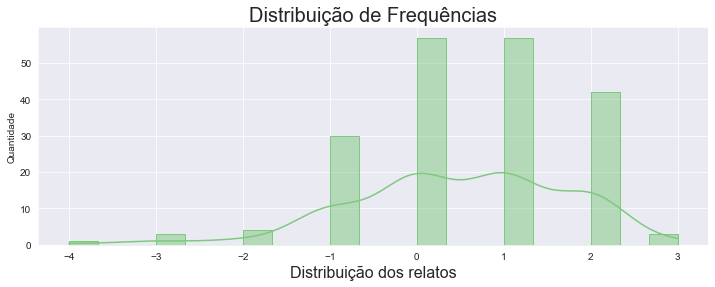

In [66]:
ax = sns.histplot(df['Relatos_com_SentiStrength'], element='step', kde = 'True')
ax.figure.set_size_inches(12,4)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Distribuição dos relatos', fontsize=16)
ax.set_ylabel('Quantidade')
ax = ax

## Relatório de uso do SentiStrength

> **Seu uso e a forma como ele faz as análises dos sentimentos é muito mais claro e simples de explicar (e utilizar) que o seu colega de trabalho SentiWordNet.**
>> **Há formas mais bem elaboradas de trabalhar os dados, não quis me aprofundar devido à complexidade que isso se tornaria.**
>>> **O objetivo do trabalho foi alcançado ao comparar a maneira de utilização das ferramentas e a forma como eles documentam as suas fórmulas de parametrização. Entre os dois, voto pela utilização do SentiStrength.**